<h2>Exercise</h2>
Create a code of M for male and F for female <br>
<code>
import pandas as pd 
df = pd.read_csv(r'data/class_heights.txt', delimiter = '|')
</code>

1 - Create a pie chart showing the percentage of men 'M' less than or equal<br>
to the average height.  Do the same for female 'F'.
2 - Create a quartile chart of height distribution for men , then women

In [24]:
import pandas as pd 

df = pd.read_csv(r'data/class_heights.txt', delimiter = '|')
df['Height_inches'] = df['height'].apply(lambda x: eval(x.replace("'","*12+")))
df['Height_inches'].astype('float64')
df['gender_abv'] = df['gender'].apply(lambda x: 'F' if x == 'female' else 'M')
df_male = df[df.gender_abv == 'M']
df_male_mean = df_male['Height_inches'].mean()
df_female = df[df.gender_abv == 'F']
df_female_mean = df_female['Height_inches'].mean()
print(df_male.head(10))
print(df_female.head(10))
print(f'The average male height is {df_male_mean}' )
print(f'The average female height is {df_female_mean}' )

   gender height  Height_inches gender_abv
0    male    5'9             69          M
3    male   6'10             82          M
4    male    5'7             67          M
7    male    6'1             73          M
9    male    5'6             66          M
10   male    5'8             68          M
13   male    6'2             74          M
14   male    5'3             63          M
17   male    6'4             76          M
19   male    5'5             65          M
    gender height  Height_inches gender_abv
1   female    5'2             62          F
2   female    5'6             66          F
5   female    5'3             63          F
6   female    5'5             65          F
8   female    5'4             64          F
11  female    5'1             61          F
12  female    5'0             60          F
15  female    5'6             66          F
16  female   5'10             70          F
18  female    5'2             62          F
The average male height is 70.425
The avera

The number of males less than average height 46
The number of males greater than or equal average height 34
The number of females less than average height 44
The number of females greater than or equal average height 36


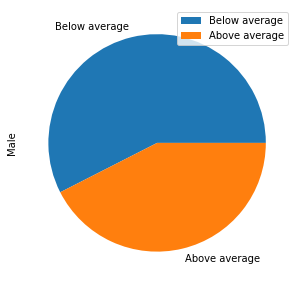

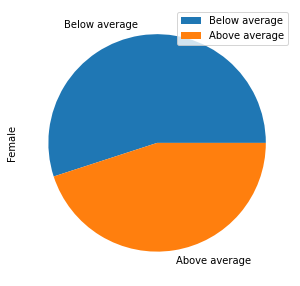

In [25]:
df_male[df_male.Height_inches < df_male_mean].sort_values(by='Height_inches')
num_male_below = df_male[df_male.Height_inches < df_male_mean]['Height_inches'].count()
num_male_above = df_male[df_male.Height_inches >= df_male_mean]['Height_inches'].count()
print(f'The number of males less than average height {num_male_below}')
print(f'The number of males greater than or equal average height {num_male_above}')
# 
df_female[df_female.Height_inches < df_female_mean].sort_values(by='Height_inches')
num_female_below = df_female[df_female.Height_inches < df_female_mean]['Height_inches'].count()
num_female_above = df_female[df_female.Height_inches >= df_female_mean]['Height_inches'].count()
print(f'The number of females less than average height {num_female_below}')
print(f'The number of females greater than or equal average height {num_female_above}')
#  ['Below average','Above average']
height_df = pd.DataFrame({'Below Average':[num_male_below,num_female_below],
                      'Above Average':[num_male_above,num_female_above]}, index = ['Male','Female'])
height_df
for i in height_df.itertuples():
    df = pd.DataFrame({i[0]:[i[1],i[2]]}, index = ['Below average','Above average'])
    df.plot.pie(y = i[0], figsize = (5,5))

<h2>Consolidating the code</h2>

['M' 'F'] <class 'numpy.ndarray'>
   gender height  Height_inches gender_abv
0    male    5'9             69          M
3    male   6'10             82          M
4    male    5'7             67          M
7    male    6'1             73          M
9    male    5'6             66          M
10   male    5'8             68          M
13   male    6'2             74          M
14   male    5'3             63          M
17   male    6'4             76          M
19   male    5'5             65          M
The average height for gender = 'M' is 70.425
gender = 'M' the count less than average height 46
gender = 'M' the count greater than or equal average height 34
               gender = M
Below average          46
Above average          34
    gender height  Height_inches gender_abv
1   female    5'2             62          F
2   female    5'6             66          F
5   female    5'3             63          F
6   female    5'5             65          F
8   female    5'4             64   

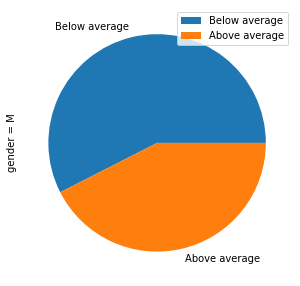

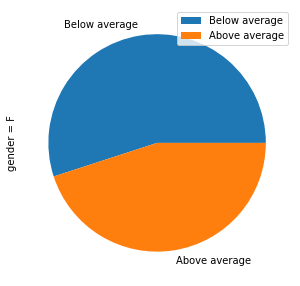

In [26]:
import pandas as pd

df = pd.read_csv(r'data/class_heights.txt', delimiter = '|')
df['Height_inches'] = df['height'].apply(lambda x: eval(x.replace("'","*12+")))
df['Height_inches'].astype('float64')
df['gender_abv'] = df['gender'].apply(lambda x: 'F' if x == 'female' else 'M')
genders = df['gender_abv'].unique()
print(genders,type(genders))
for gender in genders:
    df_gender = df[df.gender_abv == gender]
    print(df_gender.head(10))
    mean_value = df_gender['Height_inches'].mean()
    print(f"The average height for gender = '{gender}' is {mean_value}" )
    below_mean = df_gender[df_gender.Height_inches < mean_value]['Height_inches'].count()
    above_mean = df_gender[df_gender.Height_inches >= mean_value]['Height_inches'].count()
    print(f"gender = '{gender}' the count less than average height {below_mean}")
    print(f"gender = '{gender}' the count greater than or equal average height {above_mean}")
    # height_df = pd.DataFrame({'Below Average': [below_mean],
    #                  'Above Average': [above_mean]}, index = [f'gender = {gender}'])
    height_df = pd.DataFrame({f'gender = {gender}': [below_mean,above_mean]},index = ['Below average','Above average'])
    print(height_df)
    height_df.plot.pie(y = f'gender = {gender}', figsize = (5,5)) 

gender = 'M' the count less than average height 46
gender = 'M' the count greater than or equal average height 34
gender = 'F' the count less than average height 44
gender = 'F' the count greater than or equal average height 36


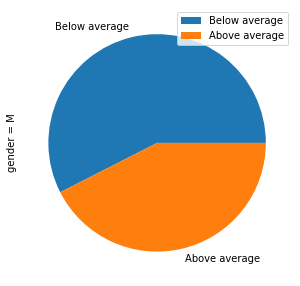

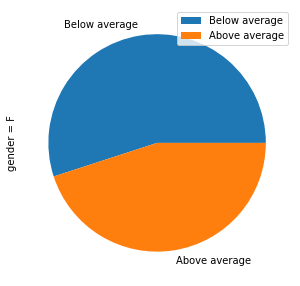

In [27]:
import pandas as pd

df = pd.read_csv(r'data/class_heights.txt', delimiter = '|')
df['Height_inches'] = df['height'].apply(lambda x: eval(x.replace("'","*12+")))
df['Height_inches'].astype('float64')
df['gender_abv'] = df['gender'].apply(lambda x: 'F' if x == 'female' else 'M')
genders = df['gender_abv'].unique()
for gender in genders:
    df_gender = df[df.gender_abv == gender]
    mean_value = df_gender['Height_inches'].mean()
    below_mean = df_gender[df_gender.Height_inches < mean_value]['Height_inches'].count()
    above_mean = df_gender[df_gender.Height_inches >= mean_value]['Height_inches'].count()
    print(f"gender = '{gender}' the count less than average height {below_mean}")
    print(f"gender = '{gender}' the count greater than or equal average height {above_mean}")
    height_df = pd.DataFrame({f'gender = {gender}': [below_mean,above_mean]},index = ['Below average','Above average'])
    height_df.plot.pie(y = f'gender = {gender}', figsize = (5,5)) 

In [28]:
low_boundary = df_gender['Height_inches'].min()
high_boundary = df_gender['Height_inches'].max()
a = df_gender['Height_inches'].describe().loc['25%'] # .loc['25%']
b = df_gender['Height_inches'].describe().loc['50%']
c = df_gender['Height_inches'].describe().loc['75%']
print(low_boundary,a,b,c,high_boundary)
# manual representation of the 1st quartile
q_1 = df_gender['Height_inches'][df_gender.Height_inches < 63].count()
print(q_1)

60 63.0 65.0 66.25 71
18
